In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool2D, Flatten, Dense
from keras import backend as K
from tensorflow.keras import initializers
import PIL
from PIL import ImageOps
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
from imageio import imread
from keras.layers import concatenate
from keras.utils import plot_model
%matplotlib inline

# workstation used
ans = input('self or lab: ')
if ans == 'self':
    idi = '/home/neo11/Documents'
    print('using neo11')
else:
    idi = '/home/melcher/Documents/Nihal'
    print('using melcher')

self or lab: self
using neo11


In [4]:
# paramter
# stride 1
s1 = 1
# stride 2
s2 = 2

# input image size for 1 color(a*b)
a =128
b = 128

# type of image
g = 1 # grayscale
rgb =3 # RGB image 

# no. of filters
f1 = 16
f2 = 32

# kernel size
n = 5
m =3
n1 =4

#padding
p =2

# epochs
epochs = 100

# image size
image_size = (a,b)

# batch size
batch_size = 32

# learning rate
lr = 0.001

# get input
a = input('original or 2? :')

dataset_path = idi + '/ML in microfluids/svd_dataset2/train' #'/content/drive/MyDrive/ML in microfluids/train'
testing_path = idi + '/ML in microfluids/svd_dataset2/test' #'/content/drive/MyDrive/ML in microfluids/cvd'

# data generator
train_datagen =ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'sparse',
    subset = 'training',
    color_mode = 'grayscale',
    shuffle = True
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'sparse',
    subset = 'validation',
    color_mode = 'grayscale',
    shuffle = True
)

test_batches = test_datagen.flow_from_directory(
    testing_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)

original or 2? :2
Found 548 images belonging to 2 classes.
Found 137 images belonging to 2 classes.
Found 345 images belonging to 2 classes.


In [5]:
# self defined activation functions
def scaled_tanh(x, beta = 0.2):
    return K.tanh(beta * x)/beta

def scaled_leaky_relu(x, f, alpha):
    if x > 0:
        val = f*x
    else:
        val = alpha*x
    return val

In [6]:
def n_gray(img):
    ii = np.array(img)
    r, g, b = ii[:,:,0], ii[:,:,1], ii[:,:,2]
    rf , gf, bf = 0.5, 2, 1.5
    a = (rf*r +gf*g + bf*b)/4
    return a

In [7]:
# printing n images from the batches
n =4

def plot(img_arr):
  fig, axes = plt.subplots(1,n)
  axes = axes.flatten()
  for img, ax in zip(img_arr, axes):
    ax.imshow(img, cmap ='gray')
    ax.axis('off')
  plt.tight_layout()
  plt.show()

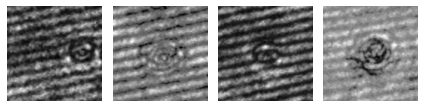

[0. 1. 0. 1.]


In [8]:
# for training batches
imgs, labels = train_batches[3]
plot(imgs)
print(labels[:n])

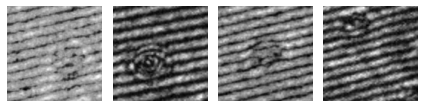

[0. 1. 0. 0.]


In [9]:
# for validation batches
imgs, labels = validation_batches[0]
plot(imgs)
print(labels[:n])

In [ ]:
class Swish(Layer):

    def __init__(self, beta=1.0, alpha = 0.3, trainable=False, **kwargs):
        super(Swish, self).__init__(**kwargs)
        self.supports_masking = True
        self.beta = beta
        self.alpha = alpha
        self.trainable = trainable

    def build(self, input_shape):
        self.beta_factor = K.variable(self.beta,
                                      dtype=K.floatx(),
                                      name='beta_factor')
        self.alpha_factor = K.variable(self.alpha,
                                      dtype=K.floatx(),
                                      name='alpha_factor')
        if self.trainable:
            self._trainable_weights.append(self.beta_factor)

        super(Swish, self).build(input_shape)
        
        if self.trainable:
            self._trainable_weights.append(self.alpha_factor)

        super(Swish, self).build(input_shape)

    def call(self, inputs, mask=None):
        return swish(inputs, self.beta_factor)

    def get_config(self):
        config = {'beta': self.get_weights()[0] if self.trainable else self.beta,
                  'trainable': self.trainable}
        base_config = super(Swish, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

    def compute_output_shape(self, input_shape):
        return input_shape

In [ ]:
# traing model(optimizer_2)
history = model.fit(
    train_batches,
    validation_data = validation_batches,
    epochs =epochs,
    steps_per_epoch=len(train_batches),           # no. of batches in an epoch
    validation_steps = len(validation_batches)
)

Epoch 1/100
16/16 [==============================] - 77s 5s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 2/100
16/16 [==============================] - 77s 5s/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 3/100
16/16 [==============================] - 79s 5s/step - loss: 0.6934 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 4/100
16/16 [==============================] - 79s 5s/step - loss: 0.6935 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 5/100
16/16 [==============================] - 81s 5s/step - loss: 0.6935 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 6/100
16/16 [==============================] - 79s 5s/step - loss: 0.6931 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 7/100
16/16 [==============================] - 79s 5s/step - loss: 0.6932 - accuracy: 0.5063 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 8/100
1

3/3 [==============================] - 5s 1s/step - loss: 0.0023 - accuracy: 1.0000


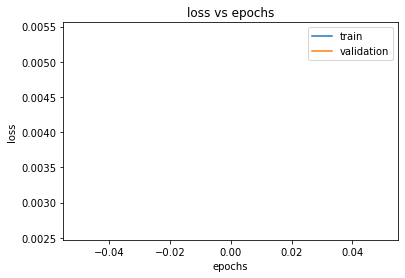

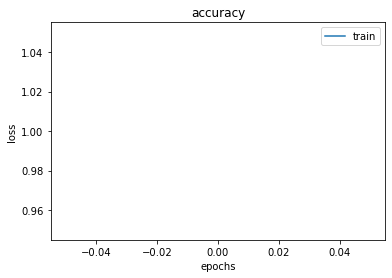

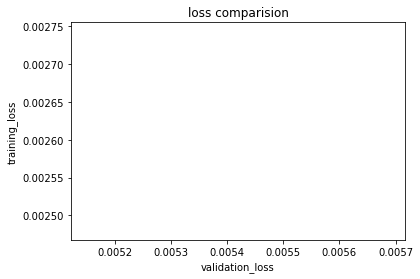

In [31]:
# test loss and accuracy
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))

# plotting
plt.plot(history.history['loss'], label = ['train'])
plt.plot(history.history['val_loss'], label =['validation'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'],loc='upper right')
plt.show()

# plotting training and validtition accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'],loc='upper right')
plt.show()

# plotting training vs validtition loss
plt.plot(history.history['val_loss'],history.history['loss'])
plt.title('loss comparision')

plt.ylabel('training_loss')
plt.xlabel('validation_loss')
plt.show()

In [35]:
print(train_batches.class_indices)
print(test_batches.class_indices)

{'Cell': 0, 'comp': 1}
{'Cell': 0, 'comp': 1}


In [44]:
# saving model
!mkdir -p saved_model
model.save('18_layer_model_GRAY')

INFO:tensorflow:Assets written to: 18_layer_model_GRAY/assets


INFO:tensorflow:Assets written to: 18_layer_model_GRAY/assets


In [47]:
directory = '/home/neo11/Documents/ML in microfluids/models trained' # model saved in the directory
name = '14_layer_GRAY'
di = directory + '/' + name
saved_model = tf.keras.models.load_model(di)

3/3 [==============================] - 1s 297ms/step - loss: 0.1270 - accuracy: 0.9571


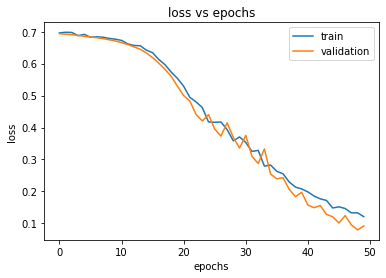

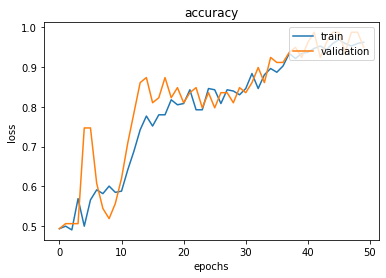

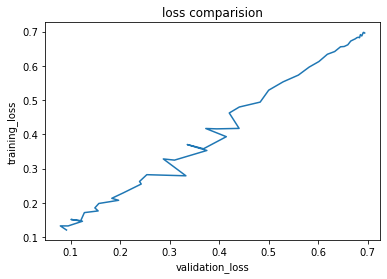

In [14]:
# test loss and accuracy
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))

# plotting
plt.plot(history.history['loss'], label = ['train'])
plt.plot(history.history['val_loss'], label =['validation'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'],loc='upper right')
plt.show()

# plotting training and validtition accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper right')
plt.show()

# plotting training vs validtition loss
plt.plot(history.history['val_loss'],history.history['loss'])
plt.title('loss comparision')

plt.ylabel('training_loss')
plt.xlabel('validation_loss')
plt.show()

In [11]:
# motivated by mobilenet + googlenet
# resnet would be tried on pytorch

model = tf.keras.models.Sequential([ 
                                    tf.keras.layers.Conv2D(64, (12,12), (2,2), activation = 'relu', padding = 'valid', input_shape= (128,128,1)),
                                    tf.keras.layers.Conv2D(64,(9,9), activation = tf.keras.layers.LeakyReLU(0.3), padding ='valid'),
                                    tf.keras.layers.Conv2D(96,(1,1), activation = scaled_tanh, padding = 'same'),
                                    tf.keras.layers.Conv2D(96, (6,6), activation = scaled_tanh, padding = 'valid'),
                                    tf.keras.layers.AveragePooling2D(pool_size = (2, 2)),
                                    tf.keras.layers.Conv2D(128, (1,1), activation = scaled_tanh, padding = 'same'),
                                    tf.keras.layers.Conv2D(128, (6,6), activation = scaled_tanh, padding = 'valid'),
                                    tf.keras.layers.AveragePooling2D(pool_size = (2, 2)),
                                    tf.keras.layers.Conv2D(192, (1,1), activation = 'tanh', padding = 'same'),
                                    tf.keras.layers.Conv2D(192, (4,4), activation = 'tanh', padding = 'valid'),
                                    tf.keras.layers.Conv2D(192, (4,4), activation = 'tanh', padding = 'valid'),
                                    tf.keras.layers.Conv2D(256, (1,1), activation = 'tanh', padding = 'valid'),
                                    tf.keras.layers.Conv2D(256, (3,3), activation = 'tanh', padding = 'valid'),
                                    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
                                    #tf.keras.layers.Dense(73, activation = tf.keras.layers.LeakyReLU(0.7)),
    #tf.keras.layers.Dropout(0.2),
                                    #tf.keras.layers.Dense(47, activation = tf.keras.layers.LeakyReLU(0.4)),
    #tf.keras.layers.Dropout(0.1),
                                    #tf.keras.layers.Dense(17, activation = 'tanh')
])

x = model.output
output = Dense(units = 2, activation = 'sigmoid')(x)

model = Model(inputs = model.input, outputs = output)

model.summary()

# tf.keras.utils.plot_model(model, to_file='model.png')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13_input (InputLayer  [(None, 128, 128, 1)]    0         
 )                                                               
                                                                 
 conv2d_13 (Conv2D)          (None, 59, 59, 64)        9280      
                                                                 
 conv2d_14 (Conv2D)          (None, 51, 51, 64)        331840    
                                                                 
 conv2d_15 (Conv2D)          (None, 51, 51, 96)        6240      
                                                                 
 conv2d_16 (Conv2D)          (None, 46, 46, 96)        331872    
                                                                 
 average_pooling2d_2 (Averag  (None, 23, 23, 96)       0         
 ePooling2D)                                               

In [58]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, 8, 2, kernel_initializer=initializers.RandomNormal(stddev = 1),
    bias_initializer = 'zero', activation = 'relu', padding = 'valid', input_shape = (128,128,1)),
    tf.keras.layers.Conv2D(96, 1, kernel_initializer=initializers.RandomNormal(stddev = 0.1),
    bias_initializer = 'zero', activation = tf.keras.layers.LeakyReLU(0.3), padding = 'valid'),
    tf.keras.layers.Conv2D(128, 6, kernel_initializer=initializers.RandomNormal(stddev = 1),
    bias_initializer = 'zero', activation = 'linear', padding = 'valid'),
    tf.keras.layers.MaxPooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(128, 6, kernel_initializer=initializers.RandomNormal(stddev = 0.1),
    bias_initializer = 'zero', activation = scaled_tanh, padding = 'valid'),
    tf.keras.layers.Conv2D(128, 1, kernel_initializer=initializers.RandomNormal(stddev = 0.1),
    bias_initializer = 'zero', activation = 'linear', padding = 'valid'),
    tf.keras.layers.Conv2D(128, 4, activation = 'elu', padding = 'valid'),
    tf.keras.layers.Conv2D(160, 4, activation = scaled_tanh, padding = 'valid'),
    tf.keras.layers.Conv2D(160, 4, activation = scaled_tanh, padding = 'valid'),
    tf.keras.layers.Conv2D(192, 1, activation = 'linear'),
    tf.keras.layers.AveragePooling2D(pool_size = (2, 2)),
    tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'valid'),
    tf.keras.layers.Conv2D(256, 3, activation = scaled_tanh, padding = 'valid'),
    tf.keras.layers.Conv2D(256, 3, activation = 'tanh', padding = 'valid'),
    tf.keras.layers.Flatten()
])

x = model.output
output = Dense(units = 2, activation = 'sigmoid')(x)

model = Model(inputs = model.input, outputs = output)

model.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_406_input (InputLaye  [(None, 128, 128, 1)]    0         
 r)                                                              
                                                                 
 conv2d_406 (Conv2D)         (None, 61, 61, 64)        4160      
                                                                 
 conv2d_407 (Conv2D)         (None, 61, 61, 96)        6240      
                                                                 
 conv2d_408 (Conv2D)         (None, 56, 56, 128)       442496    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 28, 28, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_409 (Conv2D)         (None, 23, 23, 128)       589

In [41]:
# model with resnet feature
input_img = keras.layers.Input((128,128,1), name = 'input image')
c1 = keras.layers.Conv2D(48, 8, 2, kernel_initializer=initializers.RandomNormal(stddev = 1),
                         bias_initializer = 'zero', activation = 'relu', padding = 'valid')(input_img)
c2 = keras.layers.Conv2D(48, 1, kernel_initializer=initializers.RandomNormal(stddev = 1),
                         bias_initializer = 'zero', activation = 'linear', padding = 'valid')(c1)
c3 = keras.layers.Conv2D(64, 6, kernel_initializer=initializers.RandomNormal(stddev = 1),
                         bias_initializer = 'zero', activation = 'linear', padding = 'valid')(c2) 
c4 = keras.layers.MaxPooling2D(pool_size = (2,2))(c3)
c5 = keras.layers.Conv2D(64, 6, kernel_initializer=initializers.RandomNormal(stddev = 1),
                         bias_initializer = 'zero', activation = 'linear', padding = 'valid')(c4)
c6 = keras.layers.Conv2D(96, 1, kernel_initializer=initializers.RandomNormal(stddev = 1),
                         bias_initializer = 'random_normal', activation = 'linear', padding = 'valid')(c5)
c7 = keras.layers.Conv2D(48, 4, activation = 'linear', padding = 'valid')(c6)
c8 = keras.layers.Conv2D(48, 4, activation = 'tanh', padding = 'valid')(c6)
c9 = keras.layers.concatenate([c7, c8], axis = -1)
c10 = keras.layers.Conv2D(160, 1, activation = 'linear')(c9)
c11 = keras.layers.Conv2D(32, 4, activation = scaled_tanh, padding = 'same')(c10)
c12 = keras.layers.Conv2D(128, 2, activation = scaled_tanh, padding = 'same')(c10)
c13 = keras.layers.concatenate([c11, c12], axis = -1)
c14 = keras.layers.AveragePooling2D(pool_size = (2,2))(c13)
c15 = keras.layers.Conv2D(128, 1, activation = 'linear')(c14)
c16 = keras.layers.Conv2D(64, 3, activation = 'elu', padding = 'valid')(c15)
c17 = keras.layers.Conv2D(64, 3, activation = scaled_tanh, padding = 'valid')(c15)
c18 = keras.layers.concatenate([c16, c17], axis = -1)
c19 = keras.layers.Conv2D(192, 1, activation = 'linear')(c18)
c20 = keras.layers.Conv2D(96, 3, activation = 'elu')(c19)
c21 = keras.layers.Conv2D(96, 3, activation = scaled_tanh)(c19)
c22 = keras.layers.concatenate([c20, c21], axis =-1)
c23 = keras.layers.Conv2D(256, 1, activation = 'linear')(c22)
c24 = keras.layers.Conv2D(128, 3, activation = 'elu')(c23)
c25 = keras.layers.Conv2D(128, 3, activation = scaled_tanh)(c23)
c26 = keras.layers.concatenate([c24, c25], axis =-1)
c27 = keras.layers.Conv2D(192, 1, activation = 'linear')(c26)
c28 = keras.layers.Conv2D(96, 4, activation = 'elu')(c27)
c29 = keras.layers.Conv2D(96, 4, activation = scaled_tanh)(c27)
c30 = keras.layers.concatenate([c28, c29], axis =-1)
c31 = keras.layers.Flatten()(c30)
keras.layers.Dropout(0.5)
c32 = keras.layers.Dense(160, activation = 'linear')(c31)
keras.layers.Dropout(0.5)
c33 = keras.layers.Dense(160, activation = scaled_tanh)(c31)
c34 = keras.layers.concatenate([c32, c33])

output = keras.layers.Dense(2, activation = 'sigmoid', name = 'output')(c34)
model = keras.Model(inputs = [input_img], outputs = [output])

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input image (InputLayer)       [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_144 (Conv2D)            (None, 61, 61, 48)   3120        ['input image[0][0]']            
                                                                                                  
 conv2d_145 (Conv2D)            (None, 61, 61, 48)   2352        ['conv2d_144[0][0]']             
                                                                                                  
 conv2d_146 (Conv2D)            (None, 56, 56, 64)   110656      ['conv2d_145[0][0]']       

 output (Dense)                 (None, 2)            642         ['concatenate_44[0][0]']         
                                                                                                  
Total params: 2,463,138
Trainable params: 2,463,138
Non-trainable params: 0
__________________________________________________________________________________________________


In [37]:
# example of creating a CNN with an inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
 
# function for creating a naive inception block
def inception_module(layer_in):
    c1 = keras.layers.Conv2D(48, 8, 2, activation = 'relu', padding = 'valid')(layer_in)
    c2 = keras.layers.Conv2D(48, 1, activation = 'linear', padding = 'valid')(c1)
    c3 = keras.layers.Conv2D(64, 6, activation = 'linear', padding = 'valid')(c2)
    c4 = keras.layers.MaxPooling2D(pool_size = (2,2))(c3)
    c5 = keras.layers.Conv2D(64, 6, activation = 'linear', padding = 'valid')(c4)
    c6 = keras.layers.Conv2D(96, 1, activation = 'linear', padding = 'valid')(c5)
    c7 = keras.layers.Conv2D(48, 4, activation = 'linear', padding = 'valid')(c6)
    c8 = keras.layers.Conv2D(48, 4, activation = 'tanh', padding = 'valid')(c6)
    c9 = keras.layers.concatenate([c7, c8], axis = -1)
    c10 = keras.layers.Conv2D(160, 1, activation = 'linear')(c9)
    c11 = keras.layers.Conv2D(32, 4, activation = scaled_tanh, padding = 'same')(c10)
    c12 = keras.layers.Conv2D(128, 2, activation = scaled_tanh, padding = 'same')(c10)
    c13 = keras.layers.concatenate([c11, c12], axis = -1)
    c14 = keras.layers.AveragePooling2D(pool_size = (2,2))(c13)
    c15 = keras.layers.Conv2D(128, 1, activation = 'linear')(c14)
    c16 = keras.layers.Conv2D(64, 3, activation = 'elu', padding = 'valid')(c15)
    c17 = keras.layers.Conv2D(64, 3, activation = scaled_tanh, padding = 'valid')(c15)
    c18 = keras.layers.concatenate([c16, c17], axis = -1)
    c19 = keras.layers.Conv2D(192, 1, activation = 'linear')(c18)
    c20 = keras.layers.Conv2D(96, 3, activation = 'elu')(c19)
    c21 = keras.layers.Conv2D(96, 3, activation = scaled_tanh)(c19)
    c22 = keras.layers.concatenate([c20, c21], axis =-1)
    c23 = keras.layers.Conv2D(256, 1, activation = 'linear')(c22)
    c24 = keras.layers.Conv2D(128, 3, activation = 'elu')(c23)
    c25 = keras.layers.Conv2D(128, 3, activation = scaled_tanh)(c23)
    c26 = keras.layers.concatenate([c24, c25], axis =-1)
    c27 = keras.layers.Conv2D(192, 1, activation = 'linear')(c26)
    c28 = keras.layers.Conv2D(96, 4, activation = 'elu')(c27)
    c29 = keras.layers.Conv2D(96, 4, activation = scaled_tanh)(c27)
    c30 = keras.layers.concatenate([c28, c29], axis =-1)
    c31 = keras.layers.Flatten()(c30)
    keras.layers.Dropout(0.5)
    c32 = keras.layers.Dense(160, activation = 'linear')(c31)
    keras.layers.Dropout(0.5)
    c33 = keras.layers.Dense(160, activation = scaled_tanh)(c31)
    c34 = keras.layers.concatenate([c32, c33])
    output = keras.layers.Dense(2, activation = 'sigmoid', name = 'output')(c34)
    return output
 
# define model input
input_img = Input(shape=(128, 128, 1))
# add inception module
layer = inception_module(input_img)
# create model
model = Model(inputs = input_img, outputs=layer)
# summarize model
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_122 (Conv2D)            (None, 61, 61, 48)   3120        ['input_10[0][0]']               
                                                                                                  
 conv2d_123 (Conv2D)            (None, 61, 61, 48)   2352        ['conv2d_122[0][0]']             
                                                                                                  
 conv2d_124 (Conv2D)            (None, 56, 56, 64)   110656      ['conv2d_123[0][0]']       

 output (Dense)                 (None, 2)            642         ['concatenate_37[0][0]']         
                                                                                                  
Total params: 2,463,138
Trainable params: 2,463,138
Non-trainable params: 0
__________________________________________________________________________________________________


In [38]:
# learning rate decay
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.9,
    staircase=True)

In [42]:
# Adam optimizer
optimizer_1 = tf.keras.optimizers.Adam(
    learning_rate=lr/10, # lr = 0.001
    beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-08
)

# SGD
optimizer_2 = tf.keras.optimizers.SGD(
    learning_rate=lr,
    momentum=0.001
)

# compiling model
model.compile(optimizer=optimizer_1,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
              metrics=['accuracy'])

In [43]:
# traing model(optimizer_1)
history = model.fit(
    train_batches,
    validation_data = validation_batches,
    epochs = 20,
    steps_per_epoch=len(train_batches),           # no. of batches in an epoch
    validation_steps = len(validation_batches)
)

print('------------------------------------------------------------------------------------------------------------------')

# test loss and accuracy
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))

Epoch 1/20
18/18 [==============================] - 27s 1s/step - loss: 2.4470 - accuracy: 0.6259 - val_loss: 1.7024 - val_accuracy: 0.2774
Epoch 2/20
18/18 [==============================] - 24s 1s/step - loss: 0.5544 - accuracy: 0.7774 - val_loss: 0.3866 - val_accuracy: 0.8321
Epoch 3/20
18/18 [==============================] - 29s 2s/step - loss: 0.4138 - accuracy: 0.8412 - val_loss: 0.3739 - val_accuracy: 0.8321
Epoch 4/20
18/18 [==============================] - 29s 2s/step - loss: 0.3624 - accuracy: 0.8558 - val_loss: 0.3977 - val_accuracy: 0.8467
Epoch 5/20
18/18 [==============================] - 28s 2s/step - loss: 0.3908 - accuracy: 0.8613 - val_loss: 0.8099 - val_accuracy: 0.8029
Epoch 6/20
18/18 [==============================] - 28s 2s/step - loss: 0.5663 - accuracy: 0.7901 - val_loss: 0.6168 - val_accuracy: 0.6277
Epoch 7/20
18/18 [==============================] - 22s 1s/step - loss: 0.4763 - accuracy: 0.8084 - val_loss: 0.4083 - val_accuracy: 0.8394
Epoch 8/20
18/18 [==

11/11 [==============================] - 4s 375ms/step - loss: 0.7910 - accuracy: 0.5942


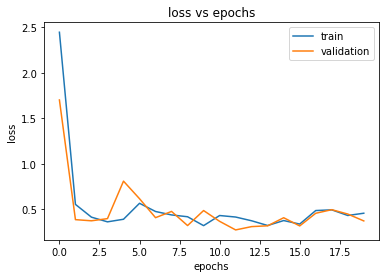

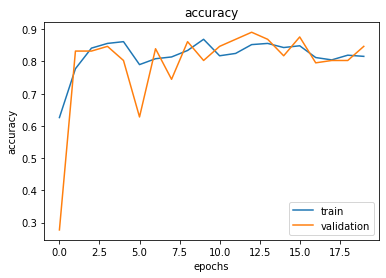

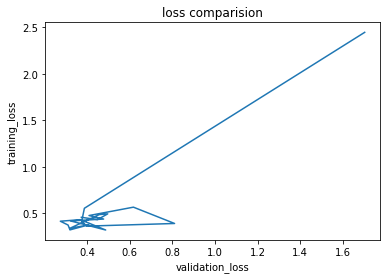

In [44]:
# test loss and accuracy
test_loss, test_accuracy = model.evaluate(test_batches, steps=len(test_batches))

# plotting
plt.plot(history.history['loss'], label = ['train'])
plt.plot(history.history['val_loss'], label =['validation'])
plt.title('loss vs epochs')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'validation'],loc='upper right')
plt.show()

# plotting training and validtition accuracy vs epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='lower right')
plt.show()

# plotting training vs validtition loss
plt.plot(history.history['val_loss'],history.history['loss'])
plt.title('loss comparision')

plt.ylabel('training_loss')
plt.xlabel('validation_loss')
plt.show()

In [14]:
# saving model in models trained directory
model.save('/home/neo11/Documents/ML in microfluids/models trained/21_mSVD')

INFO:tensorflow:Assets written to: /home/neo11/Documents/ML in microfluids/models trained/21_mSVD/assets


INFO:tensorflow:Assets written to: /home/neo11/Documents/ML in microfluids/models trained/21_mSVD/assets


In [21]:
# loading model
directory = idi + '/ML in microfluids/models trained' # model saved in the directory
name = '16_layer_SVD'
di = directory + '/' + name
saved_model = tf.keras.models.load_model(di)

OSError: No file or directory found at /home/neo11/Documents/ML in microfluids/models trained/16_layer_SVD